In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
from matplotlib.pyplot import scatter
import scipy.stats as stat
import math
import glob
import warnings 
warnings.simplefilter('ignore') 

In [3]:
df1 = pd.read_csv('../data/upwellingfootprint_seasonal_nearshore_Modified-Subregions.csv')
df1[['EBUS', 'Subregion']] = df1['Random_name'].str.split('-', 1, expand=True)
#df1['time'] = pd.to_datetime(df1[['Year', 'Month']].assign(day=1))

df1['EBUS'] = df1['EBUS'].str.replace('/','-')

df1['Season_name'] = 'NA'
df1.loc[(df1['EBUS'].isin(['California', 'Iberian-Canary'])) & (df1['Season_month'] == 6), 'Season_name'] = 'Summer'
df1.loc[(df1['EBUS'].isin(['California', 'Iberian-Canary'])) & (df1['Season_month'] == 9), 'Season_name'] = 'Fall'
df1.loc[(df1['EBUS'].isin(['California', 'Iberian-Canary'])) & (df1['Season_month'] == 12), 'Season_name'] = 'Winter'
df1.loc[(df1['EBUS'].isin(['California', 'Iberian-Canary'])) & (df1['Season_month'] == 3), 'Season_name'] = 'Spring'

df1.loc[(df1['EBUS'].isin(['Benguela', 'Humboldt'])) & (df1['Season_month'] == 12), 'Season_name'] = 'Summer'
df1.loc[(df1['EBUS'].isin(['Benguela', 'Humboldt'])) & (df1['Season_month'] == 3), 'Season_name'] = 'Fall'
df1.loc[(df1['EBUS'].isin(['Benguela', 'Humboldt'])) & (df1['Season_month'] == 6), 'Season_name'] = 'Winter'
df1.loc[(df1['EBUS'].isin(['Benguela', 'Humboldt'])) & (df1['Season_month'] == 9), 'Season_name'] = 'Spring'

df1

,Random_name,Year,Season,Season_month,Percent,Points,EBUS,Subregion,Season_name
0,Benguela-Central,2002,1,6,49.636667,98152.666667,Benguela,Central,Winter
1,Benguela-Central,2002,2,9,38.050000,75242.333333,Benguela,Central,Spring
2,Benguela-Central,2002,3,12,0.000000,0.000000,Benguela,Central,Summer
3,Benguela-Central,2003,1,6,54.523333,107812.666667,Benguela,Central,Winter
4,Benguela-Central,2003,2,9,26.796667,52988.000000,Benguela,Central,Spring
...,...,...,...,...,...,...,...,...,...
967,Iberian/Canary-Poleward,2021,2,9,3.590000,7843.000000,Iberian-Canary,Poleward,Fall
968,Iberian/Canary-Poleward,2021,3,12,89.190000,194793.666667,Iberian-Canary,Poleward,Winter
969,Iberian/Canary-Poleward,2021,4,3,70.770000,154563.000000,Iberian-Canary,Poleward,Spring
970,Iberian/Canary-Poleward,2022,3,12,87.220000,190492.500000,Iberian-Canary,Poleward,Winter


TypeError: can only concatenate str (not "numpy.int64") to str

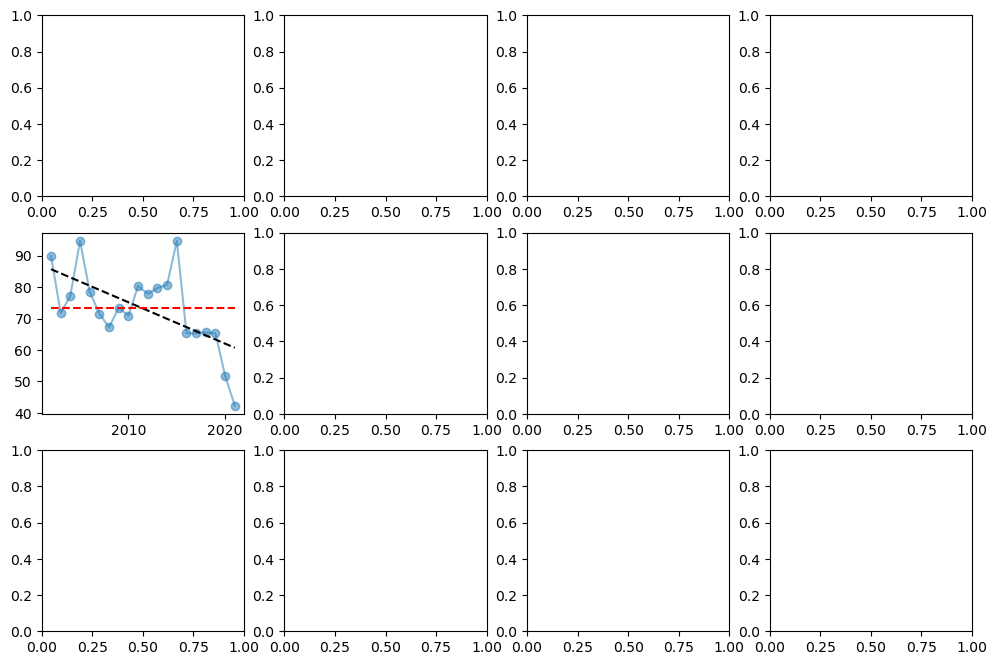

In [4]:
#loop through each ebus
for ebus in df1['EBUS'].unique():
    #create a figure (3 x 4; 3 subregions x 4 seasons)
    fig, ax = plt.subplots(3, 4, figsize = (12, 8))
    
    for i, subregion in enumerate(df1['Subregion'].unique()):
        
        if (ebus == 'Benguela') & (subregion == 'Central'):
            continue
        else: 
            for j, season in enumerate(df1['Season'].unique()):

                df_temp = df1[(df1['EBUS'] == ebus) & (df1['Subregion'] == subregion) & (df1['Season'] == season)]

                slope, intercept, r_value, p_value, std_err = stat.linregress(df_temp['Year'], df_temp['Percent'])
                y_pred = df_temp['Year'] * slope + intercept

                ax[i, j].plot(df_temp['Year'], df_temp['Percent'], 'o-', alpha = 0.5)
                ax[i, j].plot(df_temp['Year'], y_pred, '--', c = 'k')
                ax[i, j].plot(df_temp['Year'], [df_temp['Percent'].mean()] * len(df_temp['Year']), '--', c = 'red')
                ax[i, j].set_title(subregion + ' ' + season)
    
    if ebus == 'Benguela':
        fig.delaxes(ax[2, 0])
        fig.delaxes(ax[2, 1])
        fig.delaxes(ax[2, 2])
        fig.delaxes(ax[2, 3])
    
    plt.suptitle(ebus, fontsize = 16)
    plt.tight_layout()
    plt.show()


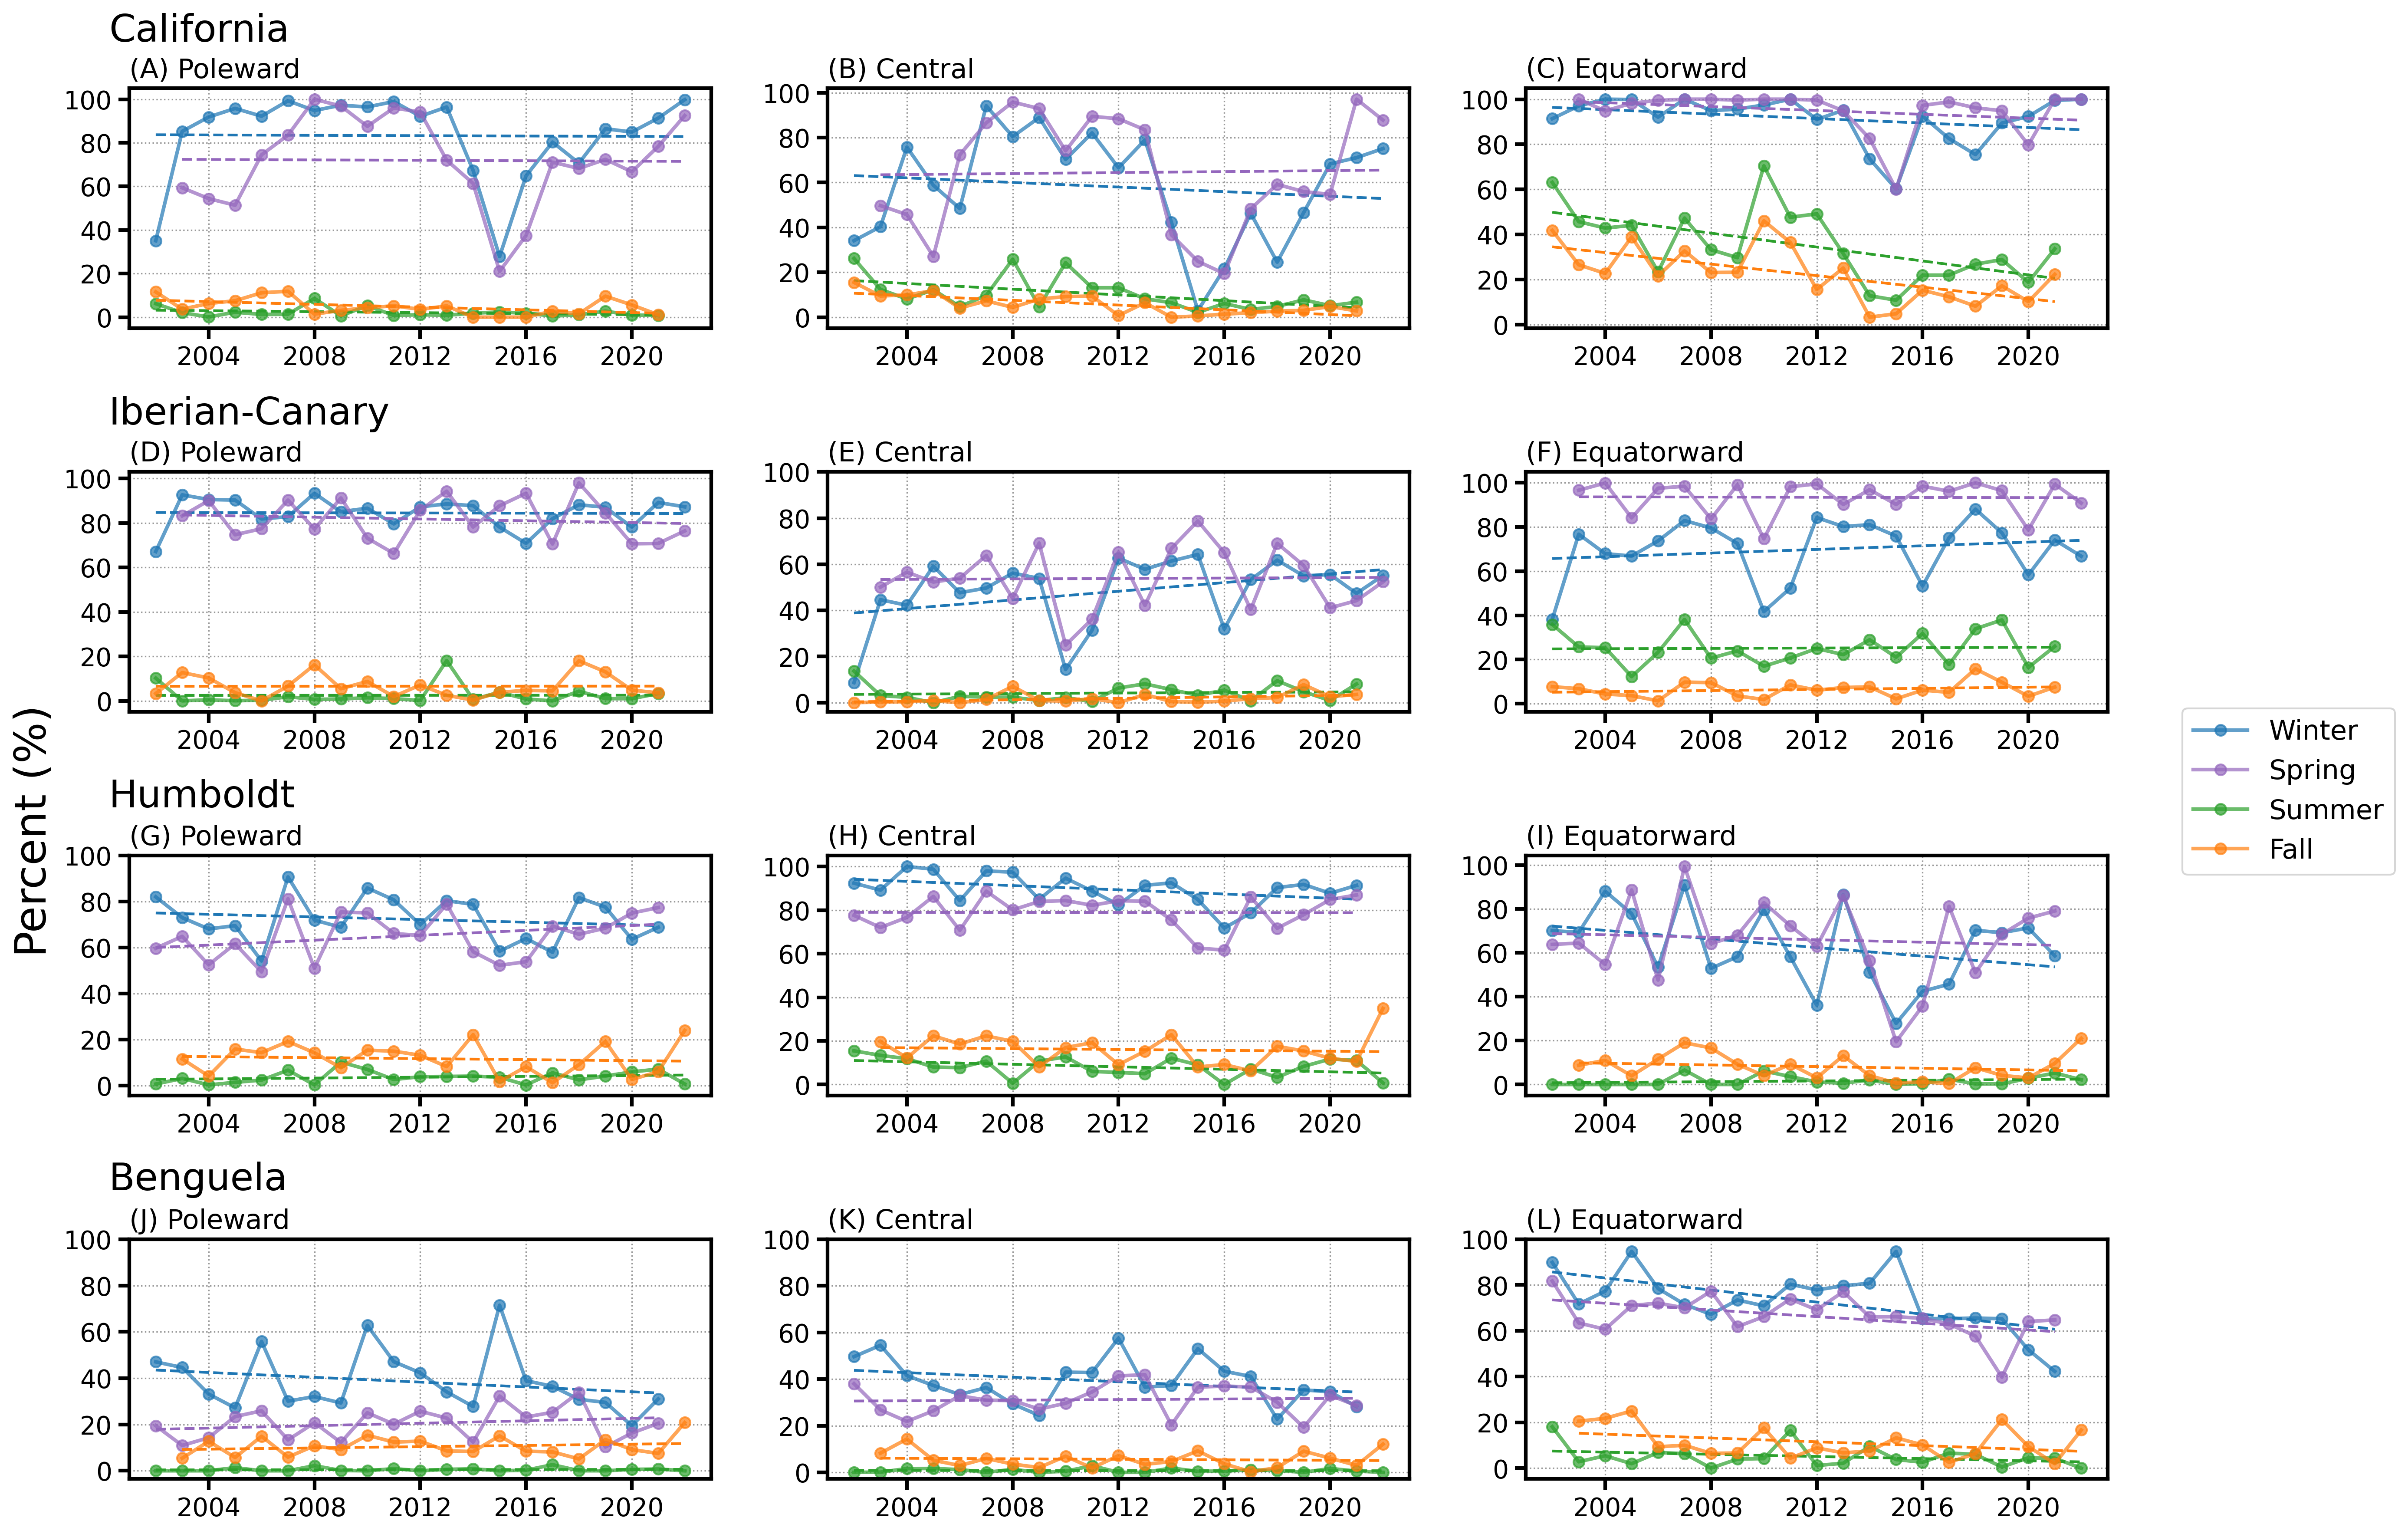

In [5]:
#create a 3x4 figure 
fig, axs = plt.subplots(4, 3, figsize=(16, 12), dpi = 300)

figure_label_list = [['A', 'B', 'C'], ['D', 'E', 'F'], ['G', 'H', 'I'], ['J', 'K', 'L']]

#loop through all of the columns/ebus
for i, figure_label_item, ebus in zip([*range(4)], range(4), ['California', 'Iberian-Canary', 'Humboldt', 'Benguela']):
    
    #loop through all of the rows/regions
    for j, figure_label, region in zip([*range(3)], figure_label_list[figure_label_item], ['Poleward', 'Central', 'Equatorward']):
        
        #filter the data
        temp = df1[(df1['EBUS'] == ebus) & (df1['Subregion'] == region)]
        
        #loop through each season
        for season, color in zip(['Winter', 'Spring', 'Summer', 'Fall'], ['tab:blue', 'tab:purple', 'tab:green', 'tab:orange']):
            
            temp_temp = temp[temp['Season_name'] == season]
        
            #plot the data but don't add the label

            slope, intercept, r_value, p_value, std_err = stat.linregress(temp_temp['Year'], temp_temp['Percent'])
            y_pred = temp_temp['Year'] * slope + intercept
            
            if (i == 3) & (j == 2):
                axs[i, j].plot(temp_temp['Year'], temp_temp['Percent'], c = color, marker = 'o', lw = 2, alpha = 0.7, label = season)
            else: 
                axs[i, j].plot(temp_temp['Year'], temp_temp['Percent'], c = color, marker = 'o', lw = 2, alpha = 0.7)
            axs[i, j].plot(temp_temp['Year'], y_pred, linestyle = '--', c = color)

        #customize the x ticks to only show four months and label them as months
        axs[i, j].set_xticks([*range(2004, 2022, 4)])
        axs[i, j].set_yticks([*range(0, 101, 20)])
        #add a grid to the data
        axs[i, j].grid(True, alpha=0.5, zorder=0)
        
        #remove the axis titles for individual plots
        axs[i, j].set_xlabel('')
        axs[i, j].set_ylabel('')
        
        #add a title that represents the region for each plot
        axs[i, j].set_title('(' + figure_label + ') ' + region, fontsize = 15, loc='left')

        #set tick labels
        axs[i, j].tick_params('both', labelsize=14, width = 2, length = 6)
        #increase line width of plot border
        [x.set_linewidth(2) for x in axs[i, j].spines.values()]
        axs[i, j].grid(c = 'grey', alpha = 0.8, zorder = 0, linestyle = 'dotted')


#adjust the figure
fig.tight_layout() 
fig.subplots_adjust(top = 0.9, bottom=0.01, hspace=0.6, wspace=0.2)
fig.legend(loc='center left', bbox_to_anchor=(1.02, 0.45), prop={'size': 15})

#add text elements for the axis labels
fig.text(-0.015, 0.35, 'Percent (%)', fontsize = 24, rotation = 90)

#add text elements for the ebus 
fig.text(0.031, 0.93, 'California', fontsize = 21, ha='left')
fig.text(0.031, 0.685, 'Iberian-Canary', fontsize = 21, ha='left')
fig.text(0.031, 0.44, 'Humboldt', fontsize = 21, ha='left')
fig.text(0.031, 0.195, 'Benguela', fontsize = 21, ha='left')

#fig.suptitle('Testing', fontsize = 24)
plt.savefig('./figures/Supplemental_AUC_EBUS_Subregion_Season.jpg', facecolor='white', bbox_inches = 'tight', dpi = 300)
